***Predicting Breast Cancer Diagnosis***

Breast cancer is one of the leading causes of death among women worldwide. Early detection plays a crucial role in improving survival rates and guiding patients toward appropriate treatment. Thanks to advances in data science and machine learning, it is now possible to develop models that assist physicians in distinguishing between benign and malignant tumors based on features measured from tissue samples.

In this study, we use a logistic regression model,a binary classification method to predict the nature of a tumor from a medical dataset. The goal is to build a simple, interpretable, and efficient model that can support clinical decision-making in the diagnosis of breast cancer.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


pandas / numpy: for data manipulation

train_test_split: to split the data into training and testing sets

LogisticRegression: the base model

metrics: to evaluate the model's performance

In [2]:
#Reading the CSV file
data = pd.read_csv("clean_data.csv")
print(data.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [5]:
#Data Preparation

#Dropping unnecessary columns (e.g., id)
X = data.drop(columns=["id", "diagnosis"])  # independents Variables 
y = data["diagnosis"]                       # target Variable

X contains the features (measurements of the cancer cells).

y contains the target variable to predict:

0 → benign

1 → malignant

In [6]:
#Splitting the data into train and test sets

#80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Creating and training the baseline model

#Creating the baseline model
model = LogisticRegression(max_iter=1000)

#Training the model on the training data
model.fit(X_train, y_train)


C:\Users\rnael\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Logistic regression calculates the probability that a tumor is malignant.

Setting max_iter=1000 prevents convergence errors.

In [8]:
# Prediction

# Set test prediction
y_pred = model.predict(X_test)


In [9]:
# Model evaluation

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", round(accuracy, 4))
print("\nConfusion matrix :\n", conf_matrix)
print("\nClassification report :\n", report)


Accuracy : 0.9561

Confusion matrix :
 [[70  1]
 [ 4 39]]

Classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



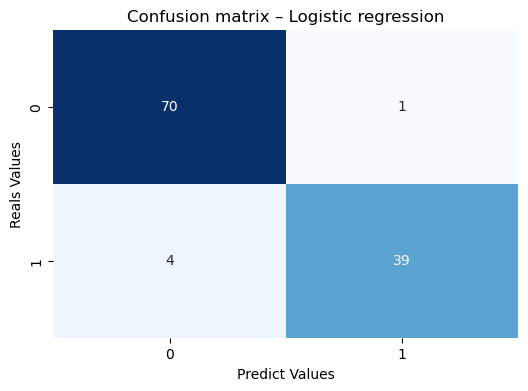

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion matrix – Logistic regression")
plt.xlabel("Predict Values")
plt.ylabel("Reals Values")
plt.show()


Accuracy: percentage of correct predictions

Confusion matrix: shows true positives/negatives and errors

Classification report: includes precision, recall, and F1-score

**Interpretation**
The model achieves an accuracy of 95.6%, meaning that 95.6% of tumors were correctly classified as benign or malignant. In other words, out of 114 test cases, 109 predictions are correct and only 5 are incorrect.

**Confusion Matrix Analysis**

70 true negatives (TN) → 70 benign tumors correctly predicted.

39 true positives (TP) → 39 malignant tumors correctly predicted.

1 false positive (FP) → 1 benign tumor incorrectly classified as malignant.

4 false negatives (FN) → 4 malignant tumors incorrectly classified as benign.

In summary:
The model tends to miss a few malignant cancer cases (4 out of 43), which is critical to monitor in a medical context.

**Overall Averages**

Accuracy = 0.96

Macro average = 0.95

Weighted average = 0.96

These values confirm excellent overall performance, balanced between the two classes.

**Business / Medical Interpretation**
The model is reliable for preliminary detection of benign and malignant tumors. However, the false negative rate (~9%) should be carefully monitored, as missing a malignant tumor is riskier than a false alarm.

In practice, this model could be used for initial automated screening but should be complemented by a more thorough medical examination.


Although logistic regression has shown excellent results with an accuracy of 95.6%, this model remains relatively simple and linear. However, the relationships between cancer cell features and tumor type can be nonlinear and more complex to model.

To further enhance the analysis and improve the model's ability to capture these complex relationships, we have chosen to explore a more advanced approach: artificial neural networks. This type of model, inspired by the functioning of the human brain, can handle multiple interactions between variables and often achieves superior performance on classification problems.

The next section therefore presents the construction, training, and evaluation of a neural network applied to our problem of predicting benign or malignant tumors.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier

pandas, numpy: for data manipulation

matplotlib, seaborn: for visualizations

train_test_split: to split the dataset into training and testing sets

StandardScaler: data normalization (very important for neural networks)

MLPClassifier: Scikit-learn’s neural network model

roc_curve, auc: to compute the overall model performance

In [12]:
## Loading the data
data = pd.read_csv("clean_data.csv")

In [13]:
## Splitting the explanatory variables (X) and the target variable (y)
X = data.drop(columns=['diagnosis']) 
y = data['diagnosis']

In [14]:
# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Model Creation
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='adam',                
    max_iter=500,                
    random_state=42
)

# Training
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [17]:
# Model evaluation

# Prediction
y_pred = mlp_model.predict(X_test)

# Prediction of the probability 
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", round(acc, 4))
print("\nConfusion matrix :\n", conf_matrix)
print("\nClassification report :\n", report)

Accuracy : 0.9825

Confusion matrix :
 [[71  1]
 [ 1 41]]

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



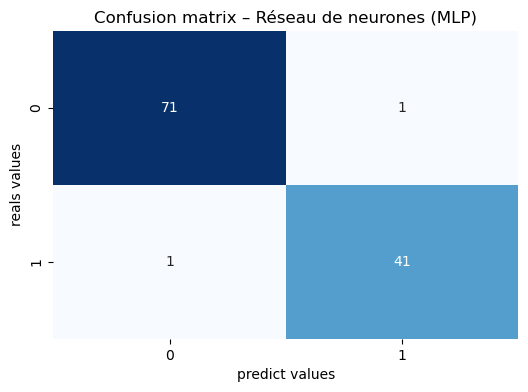

In [18]:
# Visualisation matrice de confusion

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion matrix – Réseau de neurones (MLP)")
plt.xlabel("predict values")
plt.ylabel("reals values")
plt.show()

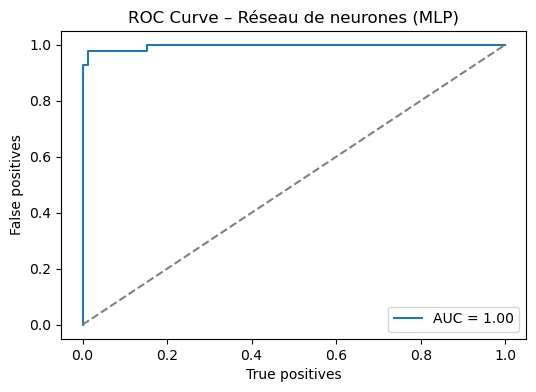

In [19]:
# Vizualisation of the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("True positives")
plt.ylabel("False positives")
plt.title("ROC Curve – Réseau de neurones (MLP)")
plt.legend()
plt.show()

**General Interpretation**

The model achieves an accuracy of 98.25%, meaning that 98.25% of tumors were correctly classified as benign or malignant. In other words, out of 114 test cases, 112 predictions are correct and only 2 are incorrect.

**Understanding the Confusion Matrix**

71 benign tumors were correctly identified as benign.

1 benign tumor was incorrectly classified as malignant (false positive).

41 malignant tumors were correctly identified as malignant.

1 malignant tumor was incorrectly classified as benign (false negative).

In practice, this means the model made only 2 mistakes out of 114 samples, which is exceptionally good for a medical problem where errors are costly.

**Clinical Interpretation**

In a medical context:

The model is highly reliable for assisting in the preliminary detection of cancer.

The error rate is extremely low:

1 false negative (malignant tumor classified as benign) → should be monitored closely, as this is the riskiest type of error in healthcare.

1 false positive → may lead to an unnecessary additional test but poses no vital risk.

**Conclusion**

The objective of this study was to build a predictive model to determine whether a tumor is benign (0) or malignant (1) based on cellular features. After data preparation and a baseline approach using logistic regression, we developed an advanced neural network model (MLPClassifier).

This model was trained on a balanced dataset and then tested on an independent sample to evaluate its performance.

The results are remarkable:

Overall Accuracy: 98.25%

Confusion Matrix:

71 benign tumors correctly identified

41 malignant tumors correctly identified

Only 2 classification errors (1 false positive and 1 false negative)

Average F1-score: 0.98

These results demonstrate excellent generalization ability of the model. It effectively distinguishes benign from malignant cases, with a very low error margin.

In practical terms, this means:

The model correctly identifies almost all cancerous tumors, reducing the risk of false negatives.

The few errors concern borderline cases, which is acceptable in an automated predictive approach.

In conclusion, the multilayer neural network (MLP) proved to be highly effective and reliable for this binary classification task. It provides a solid foundation for a medical decision support system.